A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and we have been asked to classify positive, negative, and neutral tweets.

Dataset has following features/variables

tweet_id airline_sentiment airline_sentiment_confidence negativereason negativereason_confidence airline airline_sentiment_gold name negativereason_gold retweet_count text tweet_coord tweet_created tweet_location user_timezone

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import string 
import re # this us the regular expression library which helpd us manipulate text (strings) fairly easily and antuitively
import nltk # this is the natural language tool kit which contains a lot of functionalities for text analysis
import warnings 
warnings.filterwarnings('ignore')


In [3]:
Airline_tweets = pd.read_csv('twitter-airline-sentiment.csv')
Airline_tweets

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [4]:
Airline_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [5]:
Airline_tweets.drop('tweet_coord',axis=1,inplace=True)
Airline_tweets.drop('airline_sentiment_gold',axis=1,inplace=True)
Airline_tweets.drop('negativereason_gold',axis=1,inplace=True)
Airline_tweets.head(3)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)


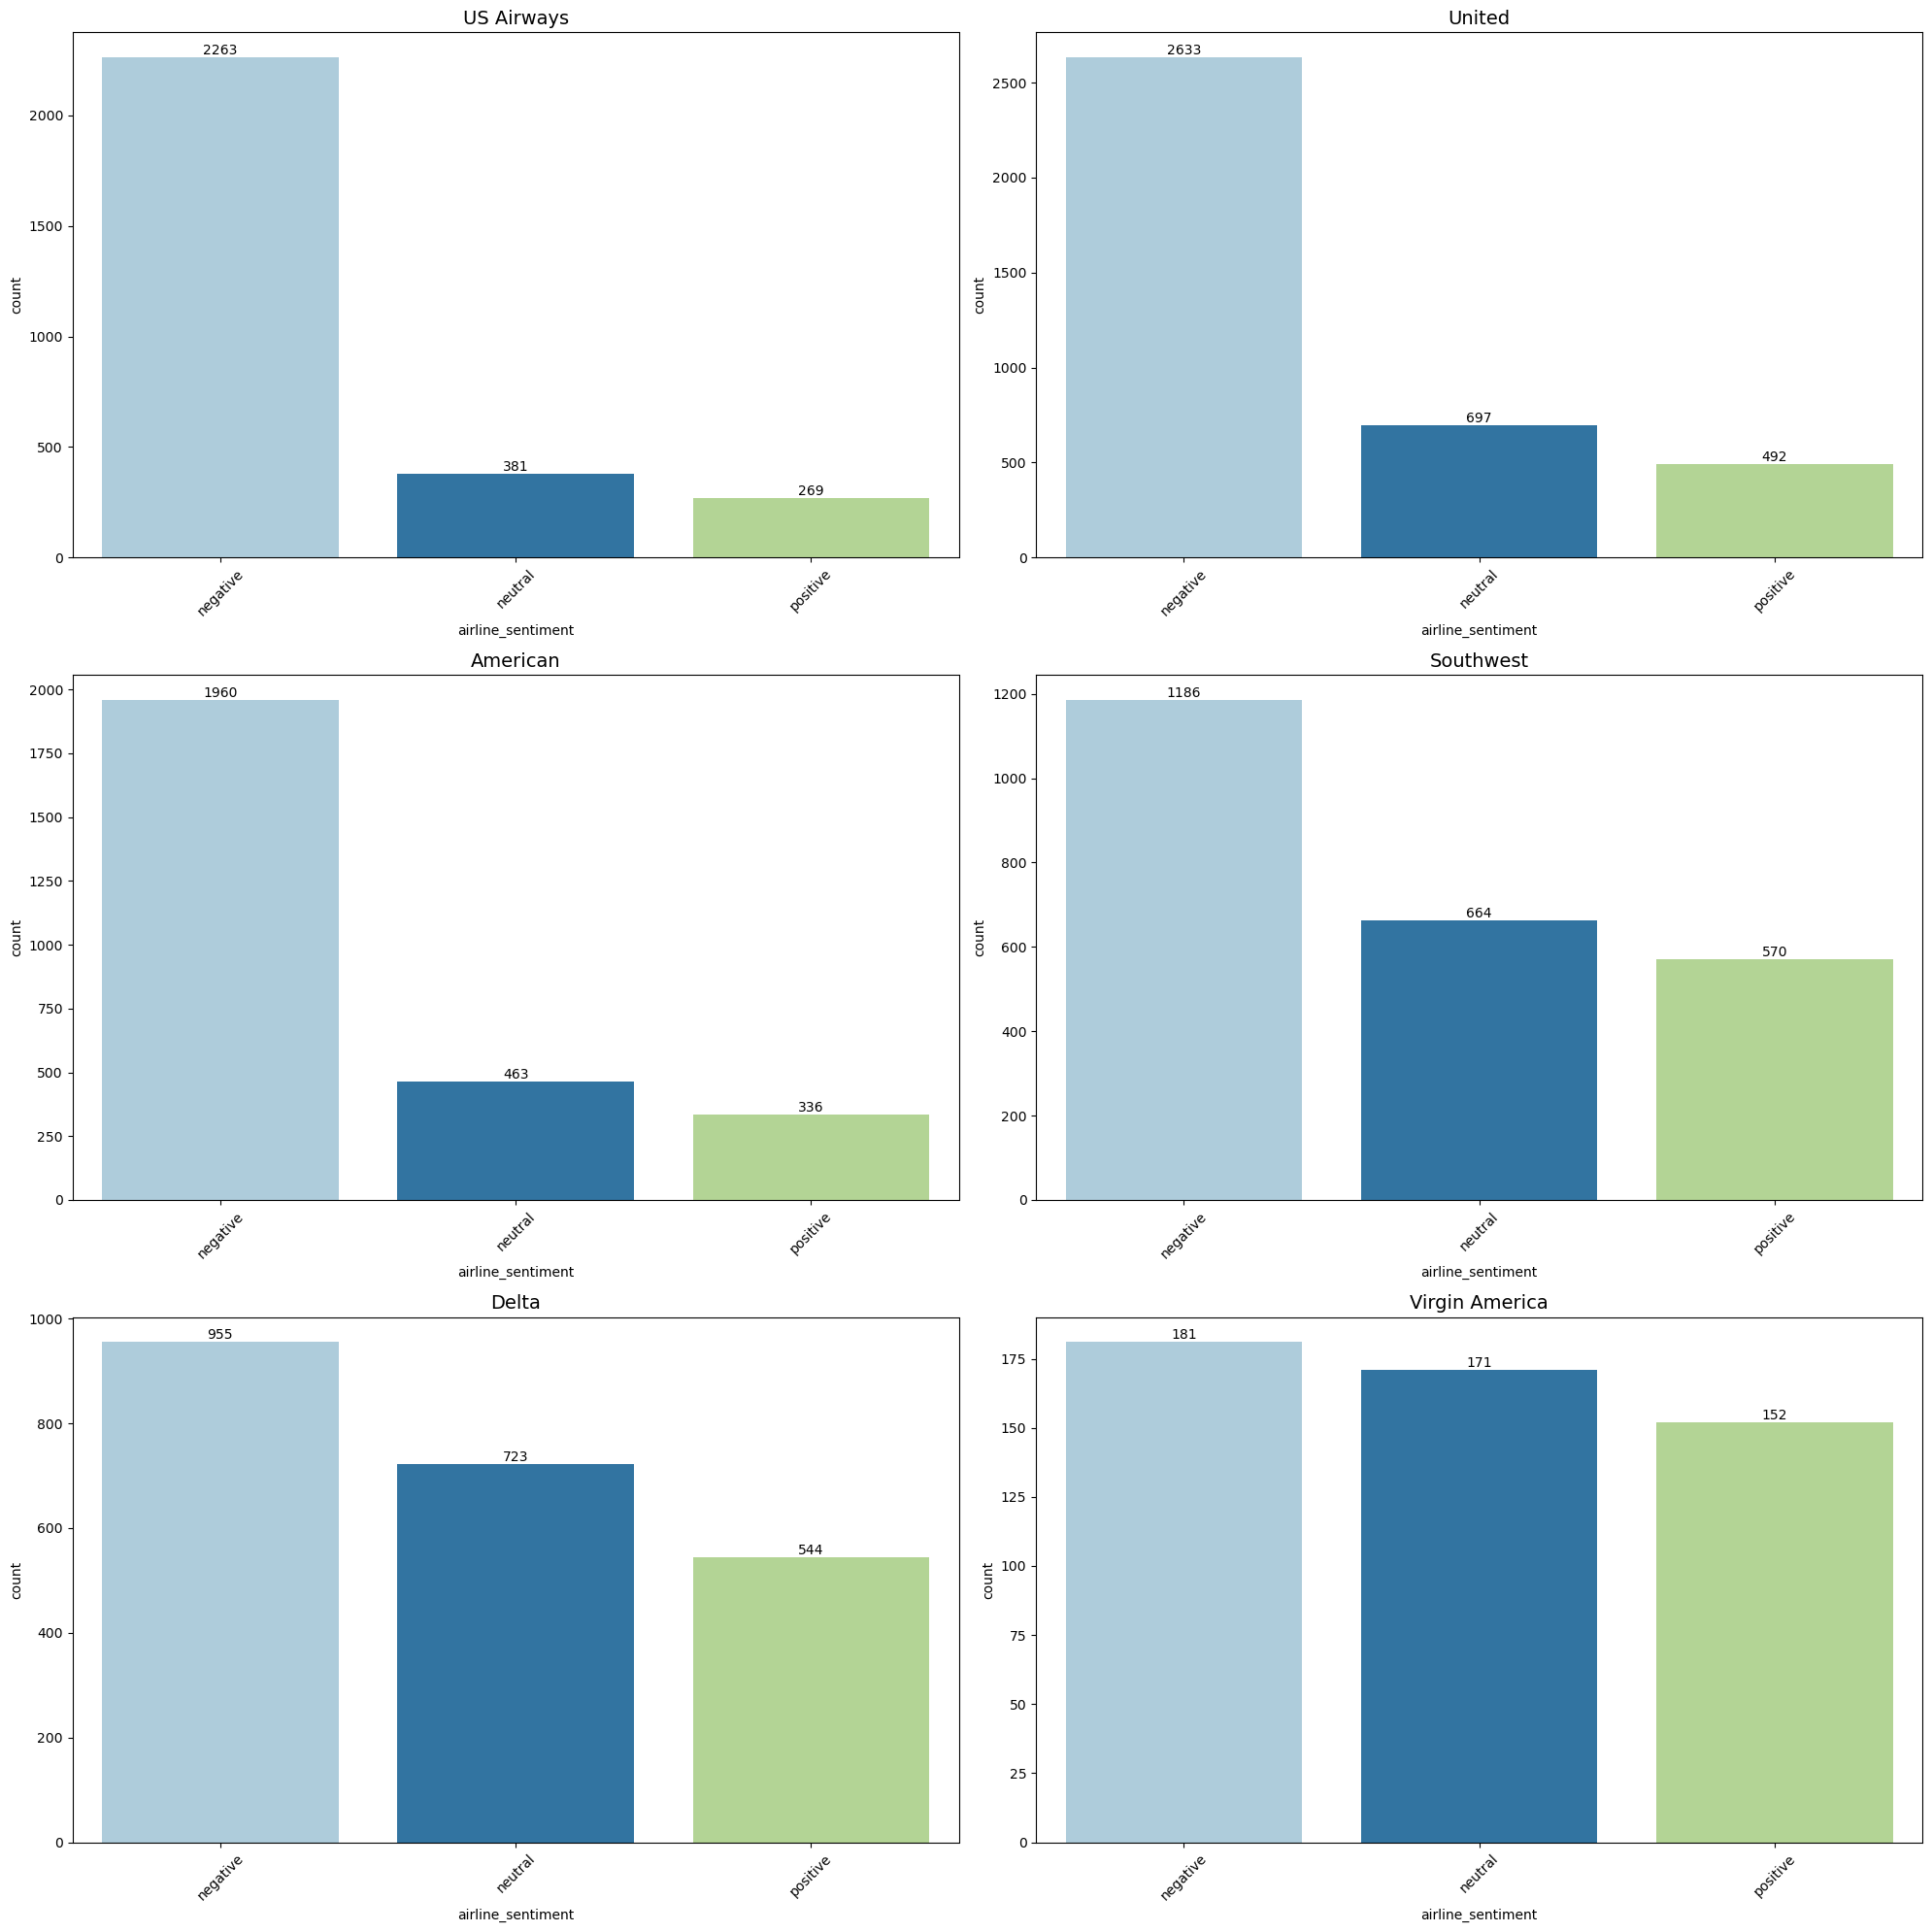

In [6]:
fig = plt.figure(figsize=(20, 20))
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']

j = 1
for i in range(len(airlines)):
    plt.subplot(3, 2, j)  # Create subplot in a 3x2 grid


    # Filter the DataFrame by airline name
    airline_data = Airline_tweets[Airline_tweets['airline'] == airlines[i]]

    # Create the countplot using the 'airline_sentiment' column
    sns.countplot(data=airline_data,
                  x='airline_sentiment',
                  palette='Paired',
                  order=airline_data['airline_sentiment'].value_counts().index # Order by frequency
    )

    # Get the current Axes object
    ax = plt.gca()

    # Add value labels on the bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', fontsize=10)  # Display counts as integers

    # Add title and adjust x-ticks
    ax.set_title(airlines[i], fontsize=14)
    ax.tick_params(axis='x', rotation=45)

    j += 1

# Adjust layout
plt.tight_layout()
plt.show()

In [7]:
Airline_tweets['text'][0]

'@VirginAmerica What @dhepburn said.'

In [8]:
Airline_tweets['totalwords'] = [len(x.split()) for x in Airline_tweets['text'].tolist()]
Airline_tweets[['totalwords','text']].head(3)

,totalwords,text
0,4,@VirginAmerica What @dhepburn said.
1,9,@VirginAmerica plus you've added commercials t...
2,12,@VirginAmerica I didn't today... Must mean I n...


In [9]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saurav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
nltk.download('punkt')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saurav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
stop  = stopwords.words('english')
stop

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [13]:
Airline_tweets['stopwords'] = Airline_tweets['text'].apply(lambda x:[x for  x in x.split() if x in stop ])
Airline_tweets[['text','stopwords']]

,text,stopwords
0,@VirginAmerica What @dhepburn said.,[]
1,@VirginAmerica plus you've added commercials t...,"[you've, to, the]"
2,@VirginAmerica I didn't today... Must mean I n...,"[didn't, to]"
3,@VirginAmerica it's really aggressive to blast...,"[it's, to, in, your, they, have]"
4,@VirginAmerica and it's a really big bad thing...,"[and, it's, a, about, it]"
...,...,...
14635,@AmericanAir thank you we got on a different f...,"[you, we, on, a, to]"
14636,@AmericanAir leaving over 20 minutes Late Flig...,"[over, or, until, we, were]"
14637,@AmericanAir Please bring American Airlines to...,[to]
14638,"@AmericanAir you have my money, you change my ...","[you, have, my, you, my, and, don't, your, oth..."


In [14]:
# this are stopword in the text 
Airline_tweets['stopwords'] 


0                                                       []
1                                        [you've, to, the]
2                                             [didn't, to]
3                         [it's, to, in, your, they, have]
4                                [and, it's, a, about, it]
                               ...                        
14635                                 [you, we, on, a, to]
14636                          [over, or, until, we, were]
14637                                                 [to]
14638    [you, have, my, you, my, and, don't, your, oth...
14639    [we, have, so, we, how, are, on, the, on, for,...
Name: stopwords, Length: 14640, dtype: object

In [15]:
pip  install  worldcloud

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement worldcloud (from versions: none)
ERROR: No matching distribution found for worldcloud


In [16]:
from wordcloud import WordCloud,STOPWORDS

In [17]:
new_df=Airline_tweets[Airline_tweets['airline_sentiment']=='negative']
words = ' '.join(new_df['text'])
words

'@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse @VirginAmerica and it\'s a really big bad thing about it @VirginAmerica seriously would pay $30 a flight for seats that didn\'t have this playing.\nit\'s really the only bad thing about flying VA @VirginAmerica SFO-PDX schedule is still MIA. @VirginAmerica  I flew from NYC to SFO last week and couldn\'t fully sit in my seat due to two large gentleman on either side of me. HELP! @VirginAmerica why are your first fares in May over three times more than other carriers when all seats are available to select??? @VirginAmerica you guys messed up my seating.. I reserved seating with my friends and you guys gave my seat away ... 😡 I want free internet @VirginAmerica status match program.  I applied and it\'s been three weeks.  Called and emailed with no response. @VirginAmerica What happened 2 ur vegan food options?! At least say on ur site so i know I won\'t be abl

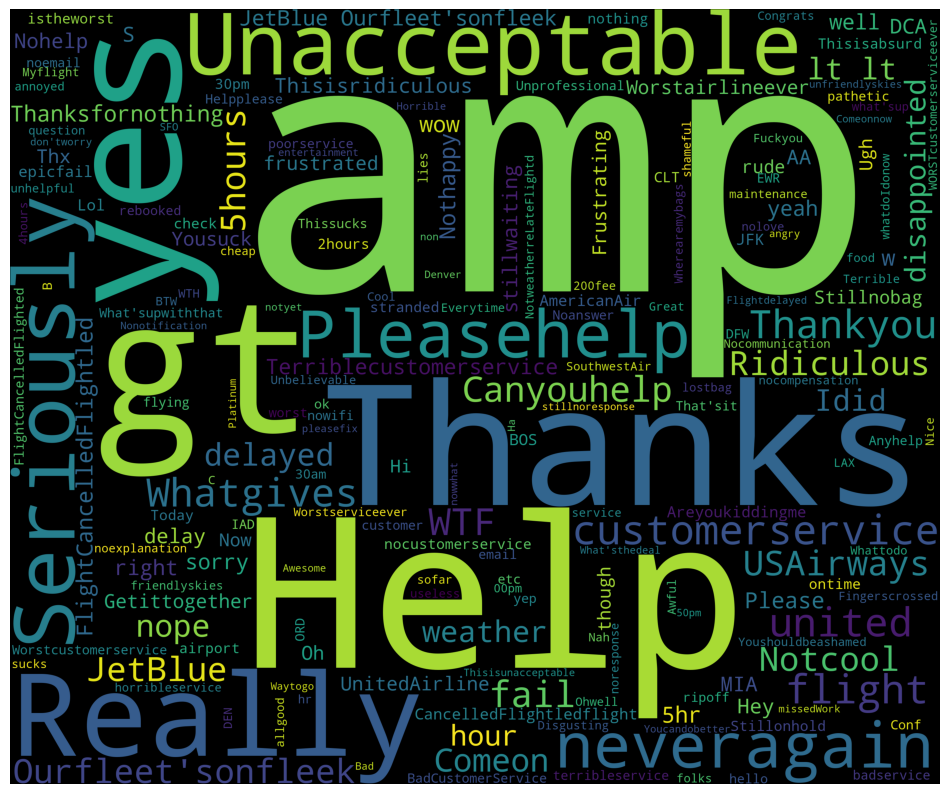

In [18]:
cleaned_word = ''.join([words for words in words.split()
                        if 'http' not in words
                        and not words.startswith('@')
                        and words !='RT'
                        ])


wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500,
                     ).generate(cleaned_word)
#plot the worldcloud image 
plt.figure(1,figsize=(12,12))
#show the image
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

       

In [19]:
Airline_tweets['negativereason'].nunique()

10

In [20]:
NR_count =dict(Airline_tweets['negativereason'].value_counts(sort=True))
NR_count

{'Customer Service Issue': 2910,
 'Late Flight': 1665,
 "Can't Tell": 1190,
 'Cancelled Flight': 847,
 'Lost Luggage': 724,
 'Bad Flight': 580,
 'Flight Booking Problems': 529,
 'Flight Attendant Complaints': 481,
 'longlines': 178,
 'Damaged Luggage': 74}

In [21]:
Airline_tweets['Tweet'] = Airline_tweets['text'].apply(lambda x:' '.join(x.lower() for x in x.split()))
Airline_tweets['Tweet'].head(5)

0                  @virginamerica what @dhepburn said.
1    @virginamerica plus you've added commercials t...
2    @virginamerica i didn't today... must mean i n...
3    @virginamerica it's really aggressive to blast...
4    @virginamerica and it's a really big bad thing...
Name: Tweet, dtype: object

In [22]:
Airline_tweets['Tweet'] = Airline_tweets['Tweet'].str.replace(r'[^\w\s]','',regex=True).str.replace(r'@','')
Airline_tweets['Tweet']

0                         virginamerica what dhepburn said
1        virginamerica plus youve added commercials to ...
2        virginamerica i didnt today must mean i need t...
3        virginamerica its really aggressive to blast o...
4        virginamerica and its a really big bad thing a...
                               ...                        
14635    americanair thank you we got on a different fl...
14636    americanair leaving over 20 minutes late fligh...
14637    americanair please bring american airlines to ...
14638    americanair you have my money you change my fl...
14639    americanair we have 8 ppl so we need 2 know ho...
Name: Tweet, Length: 14640, dtype: object

In [23]:
Airline_tweets['Tweet'][5]

'virginamerica seriously would pay 30 a flight for seats that didnt have this playing its really the only bad thing about flying va'

In [24]:
Airline_tweets['Tweet'] = Airline_tweets['Tweet'].apply(lambda x:' '.join(x for x in x.split() if x not in stop))
Airline_tweets['Tweet']

0                              virginamerica dhepburn said
1        virginamerica plus youve added commercials exp...
2        virginamerica didnt today must mean need take ...
3        virginamerica really aggressive blast obnoxiou...
4                       virginamerica really big bad thing
                               ...                        
14635       americanair thank got different flight chicago
14636    americanair leaving 20 minutes late flight war...
14637    americanair please bring american airlines bla...
14638    americanair money change flight dont answer ph...
14639    americanair 8 ppl need 2 know many seats next ...
Name: Tweet, Length: 14640, dtype: object

In [25]:
#lets look at most frequently occuring data and see if we need to keep them
#here we have taken top 30 frequently occuring

freq = pd.Series(' '.join(Airline_tweets['Tweet']).split()).value_counts()[:30]
freq

united           4143
flight           3873
usairways        3051
americanair      2957
southwestair     2452
jetblue          2361
get              1334
thanks           1072
cancelled        1056
service           956
help              855
time              770
im                764
customer          746
us                679
hours             669
flights           646
2                 644
amp               638
hold              637
plane             618
thank             602
cant              578
still             568
please            560
one               558
need              553
would             548
delayed           529
virginamerica     521
Name: count, dtype: int64

In [26]:
# this two are most frequent word but does not  give any any imapct that we remove it 
freq = ['flight','2']
freq

['flight', '2']

In [27]:
# flight and and 2 does give any value soo we remove both  of them 
Airline_tweets['Tweet'] = Airline_tweets['Tweet'].apply(lambda x:' '.join(x for x in x.split() if  x not in freq))

In [28]:
Airline_tweets['Tweet']

0                              virginamerica dhepburn said
1        virginamerica plus youve added commercials exp...
2        virginamerica didnt today must mean need take ...
3        virginamerica really aggressive blast obnoxiou...
4                       virginamerica really big bad thing
                               ...                        
14635              americanair thank got different chicago
14636    americanair leaving 20 minutes late warnings c...
14637    americanair please bring american airlines bla...
14638    americanair money change dont answer phones su...
14639    americanair 8 ppl need know many seats next pl...
Name: Tweet, Length: 14640, dtype: object

In [29]:
# RARE words add any significant to our analysis lets look at this words which will be bottom 10
freq = pd.Series(' '.join(Airline_tweets['Tweet']).split()).value_counts()[-10:]
freq

6yearold             1
portrayed            1
integrating          1
clowns               1
433                  1
milwaukee            1
httptco07xhcacjax    1
supporter            1
jesus                1
blackberry10         1
Name: count, dtype: int64

### Stemming 

In [31]:
from nltk.stem import PorterStemmer

In [32]:
st = PorterStemmer()
Airline_tweets['Tweet'][:5].apply(lambda x:' '.join([st.stem(word) for word in x.split()]))

0                          virginamerica dhepburn said
1      virginamerica plu youv ad commerci experi tacki
2    virginamerica didnt today must mean need take ...
3    virginamerica realli aggress blast obnoxi ente...
4                   virginamerica realli big bad thing
Name: Tweet, dtype: object

## Lemmatization

In [34]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\saurav\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [35]:
from nltk.stem import WordNetLemmatizer
lm = WordNetLemmatizer()
Airline_tweets['Tweet'][:5].apply(lambda x:' '.join([lm.lemmatize(word) for word in x.split()]))

0                          virginamerica dhepburn said
1    virginamerica plus youve added commercial expe...
2    virginamerica didnt today must mean need take ...
3    virginamerica really aggressive blast obnoxiou...
4                   virginamerica really big bad thing
Name: Tweet, dtype: object

In [36]:
Airline_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   name                          14640 non-null  object 
 7   retweet_count                 14640 non-null  int64  
 8   text                          14640 non-null  object 
 9   tweet_created                 14640 non-null  object 
 10  tweet_location                9907 non-null   object 
 11  user_timezone                 9820 non-null   object 
 12  totalwords                    14640 non-null  int64  
 13  s

In [74]:
# we took  tweet column 
processed_feature = Airline_tweets.iloc[:,14].values
processed_feature

array(['virginamerica dhepburn said',
       'virginamerica plus youve added commercials experience tacky',
       'virginamerica didnt today must mean need take another trip', ...,
       'americanair please bring american airlines blackberry10',
       'americanair money change dont answer phones suggestions make commitment',
       'americanair 8 ppl need know many seats next plz put us standby 4 people next'],
      dtype=object)

In [88]:
# we took airlin sentiment
labels = Airline_tweets.iloc[:,1].values
labels

array(['neutral', 'positive', 'neutral', ..., 'neutral', 'negative',
       'neutral'], dtype=object)

In [90]:
def Tweet(x):
    if x == 'positive':
        return 'NON-NEGATIVE'

    elif x == 'neutral':
        return 'NON-NEGATIVE'

    else:return 'NEGATIVE'
        
        

In [96]:
Airline_tweets['Sentiment_balance'] =  Airline_tweets['airline_sentiment'].apply(Tweet)
Airline_tweets

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,totalwords,stopwords,Tweet,Sentiment_balance
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),4,[],virginamerica dhepburn said,NON-NEGATIVE
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),9,"[you've, to, the]",virginamerica plus youve added commercials exp...,NON-NEGATIVE
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),12,"[didn't, to]",virginamerica didnt today must mean need take ...,NON-NEGATIVE
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),17,"[it's, to, in, your, they, have]",virginamerica really aggressive blast obnoxiou...,NEGATIVE
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),10,"[and, it's, a, about, it]",virginamerica really big bad thing,NEGATIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,KristenReenders,0,@AmericanAir thank you we got on a different f...,2015-02-22 12:01:01 -0800,NaN,NaN,11,"[you, we, on, a, to]",americanair thank got different chicago,NON-NEGATIVE
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,itsropes,0,@AmericanAir leaving over 20 minutes Late Flig...,2015-02-22 11:59:46 -0800,Texas,NaN,23,"[over, or, until, we, were]",americanair leaving 20 minutes late warnings c...,NEGATIVE
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,sanyabun,0,@AmericanAir Please bring American Airlines to...,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN,7,[to],americanair please bring american airlines bla...,NON-NEGATIVE
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,SraJackson,0,"@AmericanAir you have my money, you change my ...",2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada),23,"[you, have, my, you, my, and, don't, your, oth...",americanair money change dont answer phones su...,NEGATIVE


In [102]:
processed_feature = Airline_tweets['Tweet']
labels =  Airline_tweets.iloc[:,15].values

In [104]:
labels

array(['NON-NEGATIVE', 'NON-NEGATIVE', 'NON-NEGATIVE', ...,
       'NON-NEGATIVE', 'NEGATIVE', 'NON-NEGATIVE'], dtype=object)

In [108]:
#TF-IDF (Term Frequency – Inverse Document Frequency)
from sklearn.feature_extraction.text import  TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=2500,min_df=7,max_df=0.8)
processed_feature = vectorizer.fit_transform(processed_feature).toarray()
processed_feature

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [110]:
x = processed_feature
y = labels

In [112]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test =  train_test_split(x,y,
                                                  test_size=0.2,random_state=0)

In [114]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators=200,random_state=0)

In [116]:
RF_model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [118]:
from sklearn import metrics
y_pred = RF_model.predict(x_train)

In [120]:
model_score = RF_model.score(x_train,y_train)
print(model_score)

0.9967554644808743


In [122]:
print(metrics.confusion_matrix(y_train,y_pred))

[[7279   29]
 [   9 4395]]


In [126]:
print(metrics.classification_report(y_train,y_pred))


              precision    recall  f1-score   support

    NEGATIVE       1.00      1.00      1.00      7308
NON-NEGATIVE       0.99      1.00      1.00      4404

    accuracy                           1.00     11712
   macro avg       1.00      1.00      1.00     11712
weighted avg       1.00      1.00      1.00     11712



In [128]:
from sklearn import metrics
x_pred = RF_model.predict(x_test)
model_score = RF_model.score(x_test,y_test)
print(model_score)

0.7995218579234973


In [130]:
print(metrics.confusion_matrix(y_test,x_pred))

[[1644  226]
 [ 361  697]]


In [132]:
print(metrics.classification_report(y_test,x_pred))

              precision    recall  f1-score   support

    NEGATIVE       0.82      0.88      0.85      1870
NON-NEGATIVE       0.76      0.66      0.70      1058

    accuracy                           0.80      2928
   macro avg       0.79      0.77      0.78      2928
weighted avg       0.80      0.80      0.80      2928

